In [1]:
#Install and load relevant packages
!pip install --upgrade scipy gensim
!pip install fasttext-wheel

import pandas as pd
import numpy as np
import re
import scipy
import time
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

  Using cached scipy-1.15.2-cp312-cp312-win_amd64.whl.metadata (60 kB)


[nltk_data] Downloading package punkt to C:\Users\Ryhana
[nltk_data]     Rasidi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ryhana
[nltk_data]     Rasidi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#DATA PREPROCESSING
#Store first 1000 rows of Radiology dataset as new dataframe
data_radiology = pd.read_csv("radiology.csv",nrows=1000)
data_radiology

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-RR-14,10000032,22595853.0,RR,14,2180-05-06 21:19:00,2180-05-06 23:32:00,EXAMINATION: CHEST (PA AND LAT)\n\nINDICATION...
1,10000032-RR-15,10000032,22595853.0,RR,15,2180-05-06 23:00:00,2180-05-06 23:26:00,EXAMINATION: LIVER OR GALLBLADDER US (SINGLE ...
2,10000032-RR-16,10000032,22595853.0,RR,16,2180-05-07 09:55:00,2180-05-07 11:15:00,"INDICATION: ___ HCV cirrhosis c/b ascites, hi..."
3,10000032-RR-18,10000032,NaN,RR,18,2180-06-03 12:46:00,2180-06-03 14:01:00,EXAMINATION: Ultrasound-guided paracentesis.\...
4,10000032-RR-20,10000032,NaN,RR,20,2180-07-08 13:18:00,2180-07-08 14:15:00,EXAMINATION: Paracentesis\n\nINDICATION: ___...
...,...,...,...,...,...,...,...,...
995,10003299-RR-28,10003299,22087674.0,RR,28,2173-11-20 00:00:00,2173-11-20 12:54:00,EXAM: MRI brain. MRA head. MRA neck.\n\nCLI...
996,10003299-RR-32,10003299,NaN,RR,32,2176-05-14 16:54:00,2176-05-14 18:06:00,INDICATION: Evaluation of patient who stepped...
997,10003299-RR-33,10003299,NaN,RR,33,2177-10-22 11:30:00,2177-10-22 12:32:00,INDICATION: Bilateral hard tissue per requisi...
998,10003299-RR-35,10003299,NaN,RR,35,2178-10-23 11:04:00,2178-10-23 12:10:00,HISTORY: Screening.\n\nDIGITAL SCREENING MAMM...


In [5]:
# Tokenize the 'text' column
data_radiology['tokenized_text'] = data_radiology['text'].astype(str).apply(word_tokenize)
print(data_radiology[['text', 'tokenized_text']].head())

                                                text  \
0  EXAMINATION:  CHEST (PA AND LAT)\n\nINDICATION...   
1  EXAMINATION:  LIVER OR GALLBLADDER US (SINGLE ...   
2  INDICATION:  ___ HCV cirrhosis c/b ascites, hi...   
3  EXAMINATION:  Ultrasound-guided paracentesis.\...   
4  EXAMINATION:  Paracentesis\n\nINDICATION:  ___...   

                                      tokenized_text  
0  [EXAMINATION, :, CHEST, (, PA, AND, LAT, ), IN...  
1  [EXAMINATION, :, LIVER, OR, GALLBLADDER, US, (...  
2  [INDICATION, :, ___, HCV, cirrhosis, c/b, asci...  
3  [EXAMINATION, :, Ultrasound-guided, paracentes...  
4  [EXAMINATION, :, Paracentesis, INDICATION, :, ...  


In [7]:
#SKIP-GRAM MODEL
from gensim.models import Word2Vec

# List to store training times
training_times = []

# Run the training process 5 times
for i in range(5):
    print(f"\nTraining Run {i+1}...")

    # Measure Training Time
    start_time = time.time()

    # Train Word2Vec using Skip-gram model
    skipgram_model = Word2Vec(sentences=data_radiology['tokenized_text'], 
                              vector_size=100, window=5, min_count=5, 
                              sg=1, epochs=20, workers=4)

    end_time = time.time()
    elapsed_time = end_time - start_time
    training_times.append(elapsed_time)

    print(f"Training Time for Run {i+1}: {elapsed_time:.2f} seconds")

# Compute the average training time
avg_training_time = np.mean(training_times)
print(f"\nAverage Training Time over 5 runs: {avg_training_time:.2f} seconds")

# Save and load the final model (optional, based on the last run)
skipgram_model.save("skipgram.model")
skipgram_model = Word2Vec.load("skipgram.model")

# Get the vector representation of a word
print("\nVector representation of the word 'cancer':")
print(skipgram_model.wv['cancer'])

# Find most similar words
print("\nWords most similar to 'cancer':")
print(skipgram_model.wv.most_similar("cancer", topn=5))


Training Run 1...
Training Time for Run 1: 9.31 seconds

Training Run 2...
Training Time for Run 2: 8.52 seconds

Training Run 3...
Training Time for Run 3: 8.28 seconds

Training Run 4...
Training Time for Run 4: 8.46 seconds

Training Run 5...
Training Time for Run 5: 8.52 seconds

Average Training Time over 5 runs: 8.62 seconds

Vector representation of the word 'cancer':
[ 0.4194462  -0.0730458   0.48349154  0.16409902  0.2554106  -0.35038722
  0.05594266 -0.3546598   0.22296678 -0.09465137 -0.03783382 -0.42631647
  0.60893035  0.23245697 -0.16828264  0.23380469 -0.05493749 -0.23862283
 -0.7918745  -0.5450178  -0.24087682  0.5605874  -0.54024833 -0.06453766
 -0.1136795   0.46362004  0.37059915  0.29260463 -0.14840902 -0.30972925
  0.38627446 -0.09604001 -0.4852019  -0.5356526  -0.00696633  0.65661377
 -0.11441642  0.0600774   0.08957461  0.6383778   0.47944897 -0.25058457
  0.31914747  1.334817   -0.2147678  -0.20722319 -0.4724339   0.00647762
 -0.2280078  -0.7443112  -0.02698381 

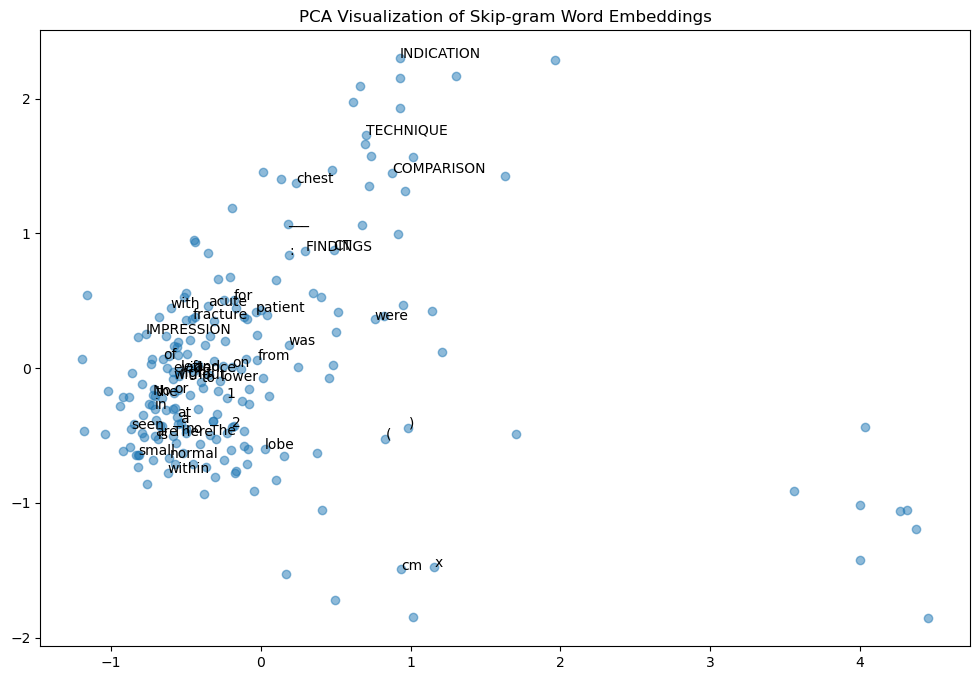

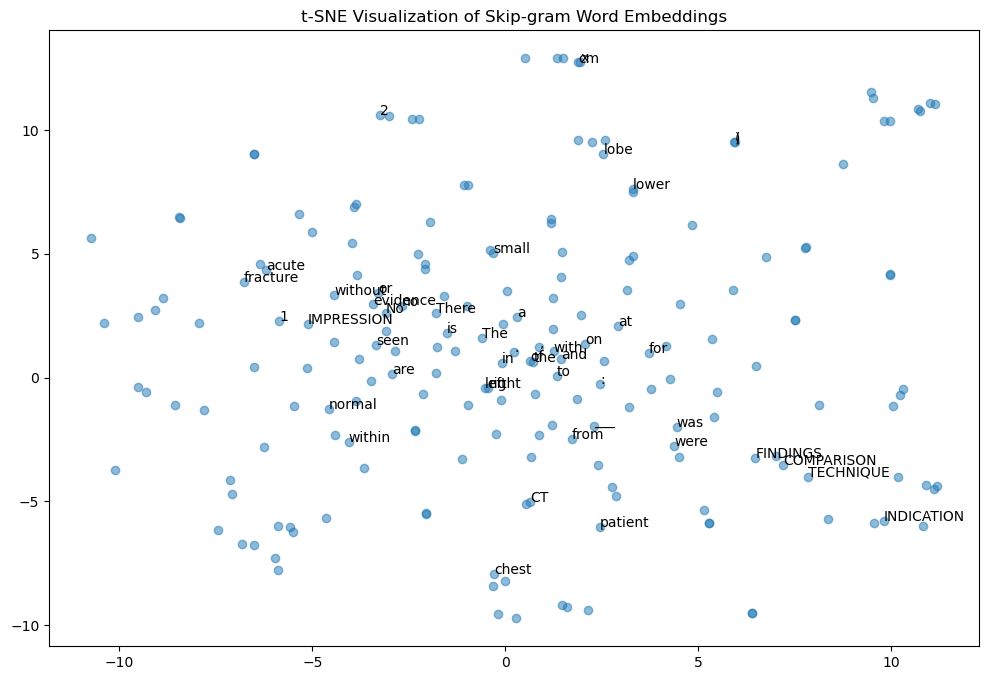

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract word vectors for visualization
words = list(skipgram_model.wv.index_to_key)[:200]  # Limit to first 200 words for clarity
vectors = np.array([skipgram_model.wv[word] for word in words])

# Apply PCA (first reducing to 2D for visualization)
pca_2d = PCA(n_components=2)
vectors_pca_2d = pca_2d.fit_transform(vectors)

# Plot PCA results
plt.figure(figsize=(12, 8))
plt.scatter(vectors_pca_2d[:, 0], vectors_pca_2d[:, 1], alpha=0.5)

# Annotate some words
for i, word in enumerate(words[:50]):  # Show only first 50 words
    plt.annotate(word, (vectors_pca_2d[i, 0], vectors_pca_2d[i, 1]))

plt.title("PCA Visualization of Skip-gram Word Embeddings")
plt.show()

# Apply PCA before t-SNE (keeping 50D for better separation in t-SNE)
pca_50d = PCA(n_components=50)
vectors_pca_50d = pca_50d.fit_transform(vectors)

# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_pca_50d)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotate some words
for i, word in enumerate(words[:50]):
    plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title("t-SNE Visualization of Skip-gram Word Embeddings")
plt.show()

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# List of word pairs
word_pairs = [
    ('pneumonia', 'infection'),
    ('cancer', 'tumor'),
    ('heart', 'biopsy'),
    ('radiograph', 'x-ray'),
    ('history', 'presenting'),
    ('gastric', 'cell')
]

# Computing cosine similarity for each pair
for word1, word2 in word_pairs:
    similarity = get_similarity(word1, word2, skipgram_model)
    print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine Similarity between 'pneumonia' and 'infection': 0.5683
Cosine Similarity between 'cancer' and 'tumor': 0.2678
Cosine Similarity between 'heart' and 'biopsy': 0.1394
Cosine Similarity between 'radiograph' and 'x-ray': 0.6129
Cosine Similarity between 'history' and 'presenting': 0.5062
Cosine Similarity between 'gastric' and 'cell': 0.4086


Running trial 1/5...
Trial 1 completed in 306.68 seconds

Running trial 2/5...
Trial 2 completed in 304.66 seconds

Running trial 3/5...
Trial 3 completed in 326.81 seconds

Running trial 4/5...
Trial 4 completed in 312.64 seconds

Running trial 5/5...
Trial 5 completed in 297.84 seconds

Average training time: 309.73 seconds per trial


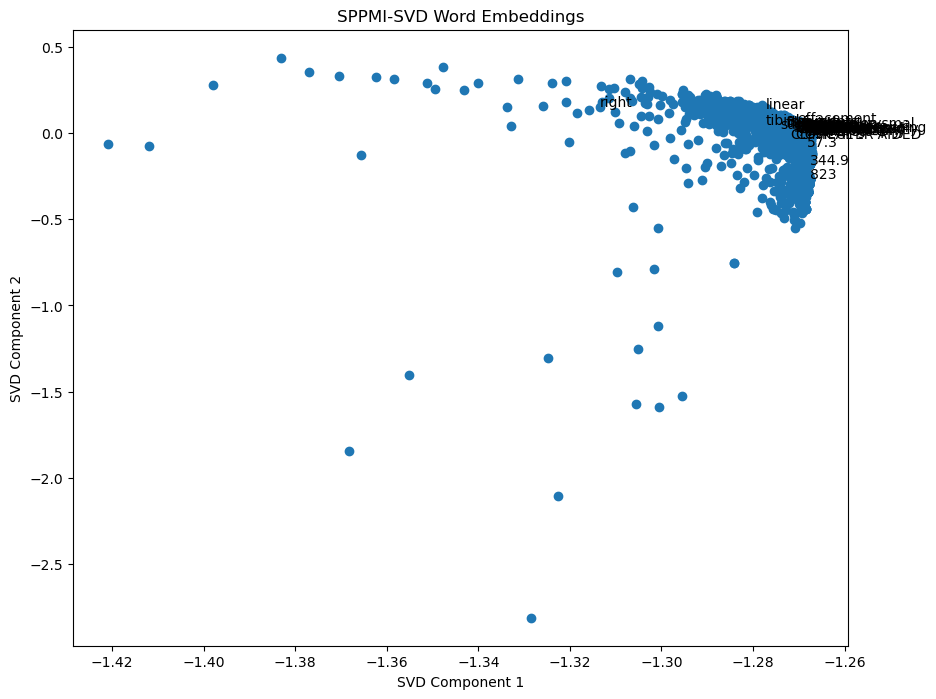

In [21]:
#SPPMI-SVD
# Build the vocabulary
sentences = data_radiology['tokenized_text'].tolist()
vocab = {word: idx for idx, word in enumerate(set(word for sentence in sentences for word in sentence))}
vocab_size = len(vocab)

# Define hyperparameters
window_size = 2
shift = 5  # Shift for SPPMI
k = 2  # Number of SVD components
num_trials = 5

def build_co_matrix(sentences, vocab, vocab_size, window_size):
    """Constructs the co-occurrence matrix."""
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)
    for sentence in sentences:
        for idx, word in enumerate(sentence):
            word_idx = vocab[word]
            start, end = max(0, idx - window_size), min(len(sentence), idx + window_size + 1)
            for context_idx in range(start, end):
                if idx != context_idx:
                    co_matrix[word_idx, vocab[sentence[context_idx]]] += 1
    return co_matrix

def compute_sppmi_matrix(co_matrix, shift):
    """Computes the Shifted Positive PMI matrix."""
    co_occurrence_sum = np.sum(co_matrix)
    p_word = np.sum(co_matrix, axis=1) / co_occurrence_sum
    sppmi_matrix = np.maximum(np.log((co_matrix / co_occurrence_sum) / (p_word[:, None] * p_word) + shift), 0)
    return sppmi_matrix

def apply_svd(sppmi_matrix, k):
    """Applies Singular Value Decomposition and returns embeddings."""
    U, Sigma, Vt = np.linalg.svd(sppmi_matrix, full_matrices=False)
    Sigma_k_sqrt = np.sqrt(np.diag(Sigma[:k]))
    return U[:, :k] @ Sigma_k_sqrt

# Run trials
start_total = time.time()
for trial in range(1, num_trials + 1):
    start = time.time()
    print(f"Running trial {trial}/{num_trials}...")
    
    co_matrix = build_co_matrix(sentences, vocab, vocab_size, window_size)
    sppmi_matrix = compute_sppmi_matrix(co_matrix, shift)
    sppmi_embeddings = apply_svd(sppmi_matrix, k)
    
    end = time.time()
    print(f"Trial {trial} completed in {end - start:.2f} seconds\n")

end_total = time.time()
average_time = (end_total - start_total) / num_trials
print(f"Average training time: {average_time:.2f} seconds per trial")

# Visualization
words = list(vocab.keys())
plt.figure(figsize=(10, 8))
plt.scatter(sppmi_embeddings[:, 0], sppmi_embeddings[:, 1])
for i, word in enumerate(words[:50]):  # Limit annotations for readability
    plt.annotate(word, (sppmi_embeddings[i, 0], sppmi_embeddings[i, 1]))
plt.title("SPPMI-SVD Word Embeddings")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

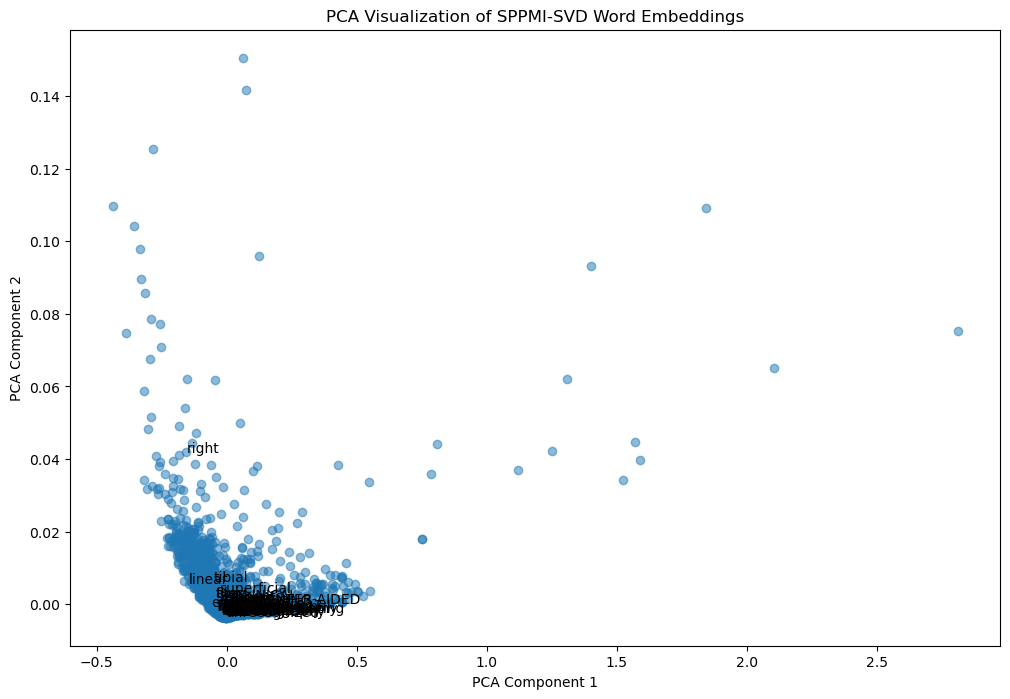

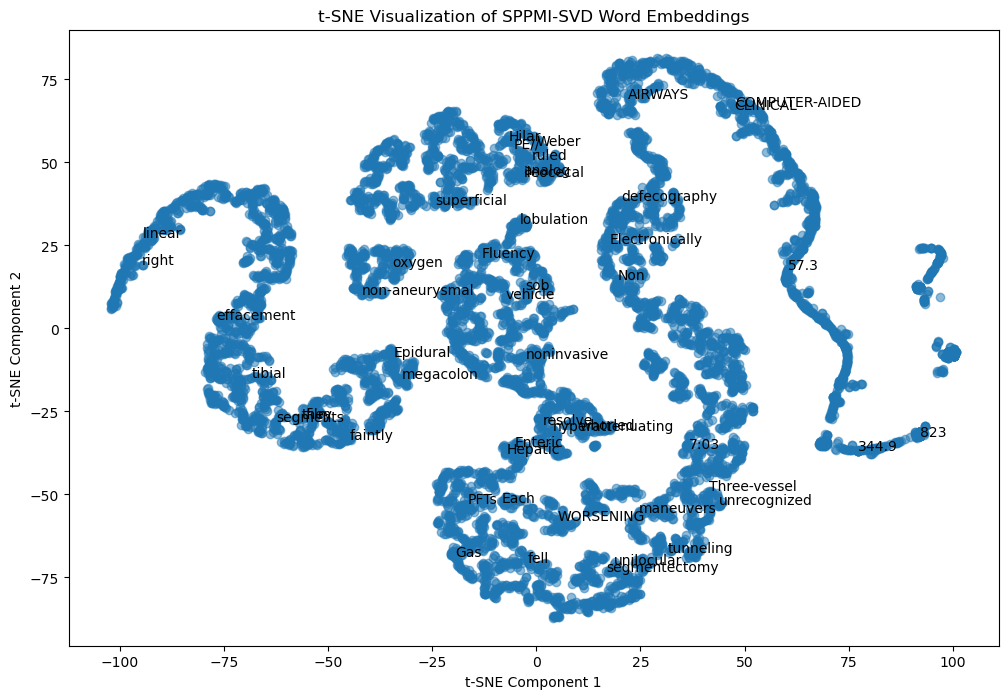

In [25]:
# Step 1: Extract the words and embeddings
words = list(vocab.keys())  # Get the vocabulary words
vectors = sppmi_embeddings  # Use the SPPMI embeddings you generated

# Step 2: Apply PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Plot PCA results
plt.figure(figsize=(12, 8))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.5)

# Annotate some words (limit to first 50 for clarity)
for i, word in enumerate(words[:50]):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.title("PCA Visualization of SPPMI-SVD Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Step 3: Apply t-SNE directly on the 2D PCA output
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_pca)

# Plot t-SNE results
plt.figure(figsize=(12, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotate some words (limit to first 50 for clarity)
for i, word in enumerate(words[:50]):
    plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title("t-SNE Visualization of SPPMI-SVD Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [29]:
# Function to get the similarity
def get_similarity(word1, word2, vocab, sppmi_embeddings):
    if word1 in vocab and word2 in vocab:
        idx1 = vocab[word1]
        idx2 = vocab[word2]
        vec1 = sppmi_embeddings[idx1].reshape(1, -1)  # Reshape for cosine_similarity
        vec2 = sppmi_embeddings[idx2].reshape(1, -1)
        similarity = cosine_similarity(vec1, vec2)[0][0]  # Extract the scalar similarity
        return similarity
    else:
        return None  # Return None if the word is not found

# List of word pairs to compute similarity
word_pairs = [
    ('pneumonia', 'infection'),
    ('cancer', 'tumor'),
    ('heart', 'biopsy'),
    ('radiograph', 'x-ray'),
    ('history', 'presenting'),
    ('gastric', 'cell')
]

# Computing cosine similarity for each pair
for word1, word2 in word_pairs:
    similarity = get_similarity(word1, word2, vocab, sppmi_embeddings)
    if similarity is not None:
        print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")
    else:
        print(f"One or both words ('{word1}', '{word2}') not found in vocabulary.")

Cosine Similarity between 'pneumonia' and 'infection': 0.9978
Cosine Similarity between 'cancer' and 'tumor': 0.9998
Cosine Similarity between 'heart' and 'biopsy': 1.0000
Cosine Similarity between 'radiograph' and 'x-ray': 1.0000
Cosine Similarity between 'history' and 'presenting': 0.9994
Cosine Similarity between 'gastric' and 'cell': 0.9999
